<h1>Определение перспективного тарифа для телеком-компании<span class="tocSkip"></span></h1>

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Ознакомление с данными и их обработка


In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#import seaborn as sns
from scipy import stats as st

import os

In [2]:
# загрузка данных
if os.path.exists('/datasets/calls.csv'):
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')
else:
    calls = pd.read_csv('/Users/olesya/datasets/calls.csv')
    internet = pd.read_csv('/Users/olesya/datasets/internet.csv')
    messages = pd.read_csv('/Users/olesya/datasets/messages.csv')
    tariffs = pd.read_csv('/Users/olesya/datasets/tariffs.csv')
    users = pd.read_csv('/Users/olesya/datasets/users.csv')


In [3]:
# изучение таблиц
def data_info(calls, internet, messages, tariffs, users):
    all_data = [calls, internet, messages, tariffs, users]
    for i in all_data:
        
        display(i.head())
        display(i.info())


In [4]:
data_info(users, calls, internet, messages, tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<b>Вывод</b>

- Пропуски только в таблице <b>users</b> в столбце <b>churn_date</b>, причем их довольно много. В описании задачи сказано: "churn_date - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)". Заменим пропуски на будущее число, например, 1 января 2021 года. И в дальнейшем будем это учитывать при изучении гипотез.
- В таблице <b>internet</b> видим ошибочный столбец <b>Unnamed: 0</b>, его необходимо удалить.
- В таблице <b>calls</b> в столбце <b>duration</b> есть нулевые значения. Но из задания сказано, что это пропущенные звонки. Удалять их не будем.


## Обработка и подготовка данных

Начнём с таблицы users. Обработаем пропуски.

In [5]:
# подсчет пропусков
users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [6]:
# замена пропусков на мнимую дату
users['churn_date'] = users['churn_date'].fillna('2021-01-01')


Удалим столбец Unnamed: 0 в таблице internet, он нам не нужен.

In [7]:
# удаление столбца методом drop
internet.drop(['Unnamed: 0'], axis = 'columns', inplace=True)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Заменим тип данных на даты во всех таблицах в столбах с датами.

In [8]:
# функция замены типа данных в datetime
def to_date(data, col):

        data[col] = pd.to_datetime(data[col], format='%Y-%m-%d')
    

In [9]:
# Перевод тип данных в datetime
to_date(users, 'churn_date')
to_date(users, 'reg_date')
to_date(calls, 'call_date')
to_date(internet, 'session_date')
to_date(messages, 'message_date')

Добавим столбцы month в таблицы calls, internet, messages.

In [10]:
# функция добавления столбца месяц 
def to_month(data, col):
    data['month'] = data[col].dt.month

In [11]:
to_month(calls, 'call_date')
to_month(internet, 'session_date')
to_month(messages, 'message_date')

Исходя из условия, что «Мегалайн» всегда округляет секунды до минут, даже если звонок длился всего 1 секунду, будет засчитан как 1 минута. Округлим звонки каждой сессии таблицы calls до целых минут. Далее сгруппируем таблицу по месяцам для каждого пользователя.

In [12]:
# округление звонков каждой сессии и суммирование их по месяцам для каждого пользователя
calls['duration'] = np.ceil(calls['duration'])
calls_per_month = calls.pivot_table(index=['user_id', 'month'], values='duration', 
                                    aggfunc=['count','sum']).reset_index()
calls_per_month.columns = ['user_id', 'month', 'count_duration', 'duration']
calls_per_month.head()

,user_id,month,count_duration,duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0


Переведем мегабайты таблицы internet в гигабайты, но в условии сказано, что общая сумма округляется в бо́льшую сторону за месяц. Значит объединим сессии за месяц и переведем в гигабайты.

In [13]:
# группировка по месяцам интернет трафика и перевод его в гигабайты с округлением для каждого пользователя
internet_per_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_per_month['mb_used'] = np.ceil(internet_per_month['mb_used']/1024)
internet_per_month.columns = ['user_id', 'month', 'gb_used']

internet_per_month.head()


,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0


In [14]:
# суммирование количества отправленных смс в месяц для каждого пользователя
messages_per_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_per_month.columns = ['user_id', 'month', 'sms']
messages_per_month.head()

,user_id,month,sms
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Объеденим три таблицы услуг с таблицей users.

In [15]:
# объединение таблиц методом merge по двум столбцам user_id и month 
calls_internet = calls_per_month.merge(internet_per_month, on=['user_id', 'month'], how='outer')
calls_internet_messages = calls_internet.merge(messages_per_month, on=['user_id', 'month'], how='outer')

all_data = users.merge(calls_internet_messages, on='user_id', how='left')
all_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms
0,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,3.0,22.0
1,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,23.0,60.0
2,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,14.0,75.0
3,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,14.0,81.0
4,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,15.0,57.0
5,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,57.0,350.0,15.0,73.0
6,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,43.0,338.0,15.0,58.0
7,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,46.0,333.0,10.0,70.0
8,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,11.0,59.0,430.0,18.0,NaN
9,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,12.0,63.0,414.0,14.0,NaN


Проверим на пропуски в таблице после объединения

In [16]:
all_data[all_data['month'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms
827,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,NaN,NaN,NaN,NaN,NaN
2335,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart,NaN,NaN,NaN,NaN,NaN


В ходе объединения нашли два пользователя с пустыми данными по услугам. Регистрация этих пользователей 15 и 25 декабря, видимо еще не успели совершить ни единого звонка и потратить ни байта. Удалим эти строки, они нам не понадобятся. 

Также в таблице встречаются пропуски по услугам. Это нормально, удалять не будем. Не все пользователи используют полный спектр услуг, кто-то пользуется только звонками, кто-то только интернетом, поэтому встречаются строки, где заполнены только длительность звонков и смс, к примеру, а интернет нет, и наоборот. Такие пропуски обработаем и заменим значения на 0. Таким образом они никак не повлияют на наши исследования.

In [17]:
# удаление строк с пустыми значениями в столбце 'month'
all_data.dropna(subset = ['month'], inplace = True)
all_data[all_data['month'].isna()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms


In [18]:
all_data = all_data.fillna(0) #замена пустых значений на 0
all_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms
0,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,3.0,22.0
1,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,23.0,60.0
2,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,14.0,75.0
3,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,14.0,81.0
4,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,15.0,57.0
5,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10.0,57.0,350.0,15.0,73.0
6,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11.0,43.0,338.0,15.0,58.0
7,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12.0,46.0,333.0,10.0,70.0
8,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,11.0,59.0,430.0,18.0,0.0
9,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,12.0,63.0,414.0,14.0,0.0


Переведем значения столбцов месяц, звонки, интернет трафик и смс в целочисленный тип.

In [19]:
# заменим тип float на int
all_data['month'] = all_data['month'].astype(int)
all_data['count_duration'] = all_data['count_duration'].astype(int)
all_data['duration'] = all_data['duration'].astype(int)
all_data['gb_used'] = all_data['gb_used'].astype(int)
all_data['sms'] = all_data['sms'].astype(int)

all_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms
0,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,3,22
1,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,23,60
2,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,14,75
3,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,14,81
4,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,15,57


<b>Вывод</b>

В каждую талиблицу услуг добавили столбец месяц, далее сгруппировали и просуммировали услуги по месяцам для каждого пользователя. Для удобства дальнейшего исследования объединили таблицы в одну. Также удалили и обработали пустые значения, перевели данные в целочисленный, где это было возможным.

## Расчёты и добавление результатов в таблицу

Переведем мегабайты таблицы tariffs в гигабайты и изменим названия столбцов.

In [20]:
tariffs['mb_per_month_included'] = np.ceil(tariffs['mb_per_month_included']/1024).astype(int)
tariffs.columns = ['messages_included', 'gb_included', 'minutes_included', 'fee', 'per_gb', 'per_message', 'per_minute', 'tariff']

tariffs.head()

,messages_included,gb_included,minutes_included,fee,per_gb,per_message,per_minute,tariff
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


Посчитаем и добавим в таблицу помесячную выручку по каждому пользователю.

In [21]:
def create_revenue(data): # функция подсчета выручки за месяц по каждому пользователю
    calls = 0
    internet = 0
    sms = 0
    smart = 550
    ultra = 1950
    
    if data['tariff'] == 'smart':
        if (data['duration'] < 500) & (data['gb_used'] < 15) & (data['sms'] < 50):
            total = smart + calls + internet + sms
            return (total)
        
        else:
            if data['duration'] > 500:
                calls = (data['duration'] - 500) * 3
            else:
                calls = 0
            
            if data['gb_used'] > 15:
                internet = (data['gb_used'] - 15) * 200
            else:
                internet = 0
                
            if data['sms'] > 50:
                sms = (data['sms'] - 50) * 3
            else:
                sms = 0
            
            total = smart + calls + internet + sms
            return (total)
    
    else:
        if (data['duration'] < 3000) & (data['gb_used'] < 30) & (data['sms'] < 1000):
            total = ultra + calls + internet + sms
            return (total)
        
        else:
            if data['duration'] > 3000:
                calls = (data['duration'] - 3000) * 1
            else:
                calls = 0
            
            if data['gb_used'] > 30:
                internet = (data['gb_used'] - 30) * 150
            else:
                internet = 0

            if data['sms'] > 1000:
                sms = (data['sms'] - 1000) * 1
            else:
                sms = 0
                                                                 
            total = ultra + calls + internet
            return (total)
     
        
all_data['revenue'] = all_data.apply(create_revenue, axis=1) 


Добавим столбец сезон в общую таблицу.

In [22]:
def create_seasons(row): # функция создания сезонов с возвратом значений, в зависимости от обработки условия
    season = row['month']
    if season in [3, 4, 5]:
        return 'Весна'
    elif season in [6, 7, 8]:
        return 'Лето'
    elif season in [9, 10, 11]:
        return 'Осень'
    else:
        return 'Зима'
all_data['season'] = all_data.apply(create_seasons, axis=1) # создание нового столбца season в зависимости от месяца пользования услугами

all_data.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,count_duration,duration,gb_used,sms,revenue,season
0,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,22,159,3,22,1950,Весна
1,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,43,172,23,60,1950,Лето
2,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,47,340,14,75,1950,Лето
3,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,52,408,14,81,1950,Лето
4,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,58,466,15,57,1950,Осень
5,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,10,57,350,15,73,1950,Осень
6,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,11,43,338,15,58,1950,Осень
7,1000,52,2021-01-01,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,12,46,333,10,70,1950,Зима
8,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,11,59,430,18,0,1150,Осень
9,1001,41,2021-01-01,Москва,Иван,Ежов,2018-11-01,smart,12,63,414,14,0,550,Зима


Теперь всё красиво. Таблица готова к дальнейшим исследованиям.

## Анализ данных

<b> Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.</b>

<b>Звонки</b>

Расчитаем среднее количество звонков, дисперсию и стандартное отклонение по каждому тарифу и выведем в общей таблице.

In [23]:
#посчёт среднего, дисперсии и стандартного отклонения
call_stat = all_data.pivot_table(index='tariff', values='duration', aggfunc=['mean', 'var', 'std'])
call_stat.columns = ['среднее', 'дисперсия', 'отклонение']
call_stat.head()

,среднее,дисперсия,отклонение
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


Построим гистрограмму длительности звонков по каждому тарифу.

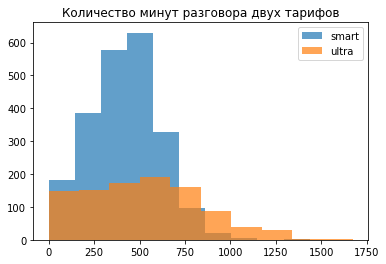

In [28]:
smart = all_data.query('tariff=="smart"')
ultra = all_data.query('tariff=="ultra"')
plt.hist(smart['duration'], alpha=0.7, label='smart')
plt.hist(ultra['duration'], alpha=0.7, label='ultra')
plt.title('Количество минут разговора двух тарифов')
plt.legend(loc='upper right');

Распределение гистограммы smart тарифа можно назвать нормальным, видно, что большая часть значений действительно лежит в промежутке от 300 до 550 минут звонков в месяц. 
Гистограмма тарифа ultra скошена вправо. Это говорит о том, что значение медианы меньше среднего, значит есть ряд высоких значений, которые влияют на среднее, но не влияют на медиану. Видим, что основная масса пользователей использует 400 - 700 минут в месяц.

Пользователи smart тарифа используют всего немного меньшее количество минут в месяц, чем пользователи ultra. Скорее всего, пользователи ultra выбирают этот тариф не из-за количества минут, а по другим причинам. Однако, распределение на гистограммах неодинаковое и можно заметить, что есть ряд пользователей ultra, которые всё-таки используют большее количество минут по назначению, хотя никто и не достигает лимита в 3000 минут.

<b>Интернет</b>

Расчитаем среднее количество интернет-трафика, дисперсию и стандартное отклонение по каждому тарифу и выведем в общей таблице.

In [29]:
#посчёт среднего, дисперсии и стандартного отклонения
internet_stat = all_data.pivot_table(index='tariff', values='gb_used', aggfunc=['mean', 'var', 'std'])
internet_stat.columns = ['среднее', 'дисперсия', 'отклонение']
internet_stat.head()

,среднее,дисперсия,отклонение
tariff,,,
smart,16.328847,33.028705,5.747061
ultra,19.494416,97.091686,9.853511


Построим гистрограмму интернет-траффика по каждому тарифу.

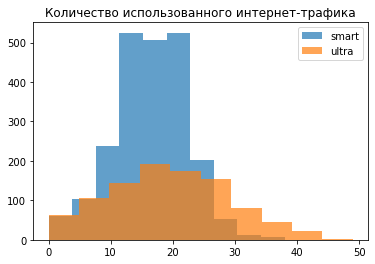

In [31]:
plt.hist(smart['gb_used'], alpha=0.7, label='smart')
plt.hist(ultra['gb_used'], alpha=0.7, label='ultra')
plt.title('Количество использованного интернет-трафика')
plt.legend(loc='upper right');

Распределение тарифа smart нормальное, видим, что чуть меньше половины пользователей придерживается крайних значений лимита в 15 Gb, однако, остальная часть пользователей докупает недостающий трафик.

По тарифу ultra основная масса пользователей используют намного больше трафика, чем пользователи smart. 2/3 пользователей укладываются в лимит, однако, есть часть, которым траффика в тарифе недостаточно.

Пользователи тарифа ultra используют гораздо больше трафика, чем пользователи более дешевого тарифа. Можно предположить, что те, кто выбирает тариф ultra заинтересованы именно в более активном пользовании интернетом.

<b>Сообщения</b>

Расчитаем среднее количество отправленных смс, дисперсию и стандартное отклонение по каждому тарифу и выведем в общей таблице.

In [32]:
#посчёт среднего, дисперсии и стандартного отклонения
sms_stat = all_data.pivot_table(index='tariff', values='sms', aggfunc=['mean', 'var', 'std'])
sms_stat.columns = ['среднее', 'дисперсия', 'отклонение']
sms_stat.head()

,среднее,дисперсия,отклонение
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


In [33]:
all_data.pivot_table(index='tariff',  
                 values=['duration', 'gb_used', 'sms'], 
                 aggfunc=['mean', 'std', 'var']).T.style.format('{:.2f}')

Построим гистрограмму количества смс для каждого тарифа.

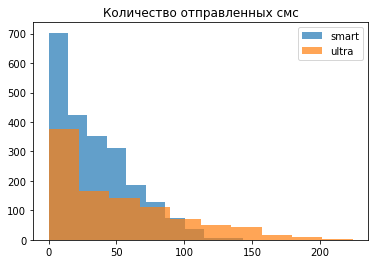

In [34]:
plt.hist(smart['sms'], alpha=0.7, label='smart')
plt.hist(ultra['sms'], alpha=0.7, label='ultra')
plt.title('Количество отправленных смс')
plt.legend(loc='upper right');

Гистограммы двух тарифов скошены вправо - среднее однозначно больше медианы. Большинство пользователей тарифа smart используют сообщения в рамках лимита (50 смс), но окло 30% всё же значительно превышают лимит, тем самым принося выручку компании.

Основная масса пльзователей ultra использует меньше сообщений, чем в smart. Однако, есть и те, кто отправляет больше 100 сообщений. Но лимита в 1000 смс не достигает никто.

<b>Вывод</b>

<b>Пользователи smart тарифа используют чуть меньшее количество минут на разговоры и отправку сообщений в месяц, чем пользователи ultra. Однако, и по звонкам и по смс 1/3 пользователей smart превышает допстимый лимит по услугам. По тарифу ultra лимита на количество доступных минут и смс в среднем не достигает никто. Интернетом активно пользуются клиенты двух тарифов, ultra гораздо активнее. Однако, больше половины пользователей тарифа smart докупают траффик, тем самым больше принося выручку компании.</b>

## Проверка гипотез

### 1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую (Н₀) и альтернативную (H₁) гипотезы. Совокупности не зависят друг от друга.

- H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не отличается
- H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» отличается

In [35]:
# зададим критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве средних двух тарифов
results = st.ttest_ind(
    smart['revenue'],
    ultra['revenue']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Нулевую гипотезу отвергаем.
Верно утверждение, что средняя выручка пользователей тарифов Смарт и Ультра различается.
Посмотрим среднюю выручку в месяц с пользователя для каждого тарифа.

In [36]:
# Средняя выручка в месяц с пользователя
revenue = all_data.pivot_table(index='tariff', values='revenue', aggfunc='mean').round(2)
revenue.head()

,revenue
tariff,
smart,1289.97
ultra,2070.15


<b>Итак, между выручкой есть разница. По среднему значению видим, что пользователи тарифа ultra в среднем приносят больше денег, так как их абонентская плата в 3,5 раза выше, чем абонентская плата пользующихся тарифом smart (1950р. против 550р.). И хотя, пользователи smart довольно часто "вылезают" за пределы своего тарифа, оплачивая дополнительные услуги, они всё равно не догоняют по тратам пользователей тарифа ultra.</b>

### 2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую (Н₀) и альтернативную (H₁) гипотезы. Совокупности не зависят друг от друга.

- H₀ - средняя выручка пользователей из Москвы и других регионов не отличается
- H₁ - средняя выручка пользователей из Москвы и других регионов отличается

In [37]:
moscow_city = all_data.query('city == "Москва"')
other_cities = all_data.query('city != "Москва"')

In [38]:
# зададим критический уровень статистической значимости
alpha = 0.05

# проверка гипотезы о равенстве средней выручки пользователей из Москвы и регионов
results = st.ttest_ind(
    moscow_city['revenue'],
    other_cities['revenue']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
  

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не получилось отвергнуть. Верно утверждение, что средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов. Посмотрим среднюю выручку в месяц пользователей по регионам.

In [39]:
# Средняя выручка в месяц пользователей из Москвы и других регионов
print('Средняя выручка в месяц пользователя из Москвы:', round(moscow_city['revenue'].mean(), 2))
print('Средняя выручка в месяц пользователя из других регионов:', round(other_cities['revenue'].mean(), 2))

Средняя выручка в месяц пользователя из Москвы: 1546.71
Средняя выручка в месяц пользователя из других регионов: 1524.94


<b>Вывод</b>

<b>Средняя выручка пользователей из Москвы и пользователей из других регионов почти равнозначна. </b>

## Общий вывод

Cоберем общие средние данные по использованным услугам и их процент от включенных в абонентскую плату лимитов:

In [40]:
limit_smart = [15, 500, 50]
limit_ultra = [30, 3000, 1000]

smart_mean_internet = (all_data[(all_data['tariff'] == 'smart')]['gb_used']/15).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Смарт" с лимитом {:.0f} Гб - {:.2%} = {:.1f} Гб'.
      format(limit_smart[0], smart_mean_internet, smart_mean_internet * 15))
smart_mean_calls = (all_data[(all_data['tariff'] == 'smart')]['duration']/500).mean()
print('Средний процент использования пакета минут по тарифу "Смарт" с лимитом {:.0f} мин - {:.2%} = {:.2f} мин'.
      format(limit_smart[1], smart_mean_calls, smart_mean_calls * 500))
smart_mean_sms = (all_data[(all_data['tariff'] == 'smart')]['sms']/50).mean()
print('Средний процент использования пакета смс по тарифу "Смарт" с лимитом {:.0f} шт - {:.2%} = {:.0f} шт'.
      format(limit_smart[2], smart_mean_sms, smart_mean_sms * 50))
print('---------------------------------------------------------------------------------')

ultra_mean_internet = (all_data[(all_data['tariff'] == 'ultra')]['gb_used']/30).mean()
print('Средний процент использования пакета интернет-трафика по тарифу "Ультра" с лимитом {:.0f} Гб - {:.2%} = {:.1f} Гб'.
      format(limit_ultra[0], ultra_mean_internet, ultra_mean_internet * 30))
ultra_mean_calls = (all_data[(all_data['tariff'] == 'ultra')]['duration']/3000).mean()
print('Средний процент использования пакета минут по тарифу "Ультра" с лимитом {:.0f} мин - {:.2%} = {:.2f} мин'.
      format(limit_ultra[1], ultra_mean_calls, ultra_mean_calls * 3000))
ultra_mean_sms = (all_data[(all_data['tariff'] == 'ultra')]['sms']/1000).mean()
print('Средний процент использования пакета смс по тарифу "Ультра" с лимитом {:.0f} шт - {:.2%} = {:.0f} шт'.
      format(limit_ultra[2], ultra_mean_sms, ultra_mean_sms * 1000))

Средний процент использования пакета интернет-трафика по тарифу "Смарт" с лимитом 15 Гб - 108.86% = 16.3 Гб
Средний процент использования пакета минут по тарифу "Смарт" с лимитом 500 мин - 83.59% = 417.93 мин
Средний процент использования пакета смс по тарифу "Смарт" с лимитом 50 шт - 66.77% = 33 шт
---------------------------------------------------------------------------------
Средний процент использования пакета интернет-трафика по тарифу "Ультра" с лимитом 30 Гб - 64.98% = 19.5 Гб
Средний процент использования пакета минут по тарифу "Ультра" с лимитом 3000 мин - 17.55% = 526.62 мин
Средний процент использования пакета смс по тарифу "Ультра" с лимитом 1000 шт - 4.94% = 49 шт


Также посчитаем средний процент и сумму выручки по каждому тарифу:

In [41]:
smart_mean_revenue = (all_data[(all_data['tariff'] == 'smart')]['revenue']/550).mean()
print('Средний процент выручки по тарифу "Смарт" - {:.2%} = {:.2f} руб'.
      format(smart_mean_revenue, smart_mean_revenue * 550))
ultra_mean_revenue = (all_data[(all_data['tariff'] == 'ultra')]['revenue']/1950).mean()
print('Средний процент выручки по тарифу "Ультра" - {:.2%} = {:.2f} руб'.
      format(ultra_mean_revenue, ultra_mean_revenue * 1950))

Средний процент выручки по тарифу "Смарт" - 234.54% = 1289.97 руб
Средний процент выручки по тарифу "Ультра" - 106.16% = 2070.15 руб


<b>Вывод</b>

Среднему пользователю тарифа Смарт не хватает 2 Гб интернета, включенных в пакет абонентской платы (15 Гб) и ему приходится дозаказывать их и доплачивать за них 400 рублей. 

Средняя выручка за переплату по тарифу Смарт составляет 234%, а это значит, что пользователи почти в 2.5 раза чаще вылезают за пределы лимита, дозаказывая доп.услуги. Однако, даже такая разница переплаты не дает больше выручки, чем пользователи тарифа Ультра, просто оплачивая абоненсткую плату.

Таким образом, в тарифной сетке есть дешевый тариф Смарт за 550 рублей, где пользователю не хватает интернета и количество использованных минут разговора на грани лимита (418 мин из 500), и есть тариф Ультра, стоимостью 1950 рублей, которым пользуется уже другой класс граждан, где лимитов по всем типам связи предостаточно.

Можно сделать вывод, что "Мегалайну" надо подумать и выработать промежуточное решение, которое позволяло бы клиенту более комфортно, без доп. заказов, пользоваться услугами связи. И возможно цена должна варьироваться в районе 1000 рублей, которые клиент готов тратить в месяц в качестве абонентской платы за более обширный пакет интернета, чем в тарифе Смарт, но меньше, чем в Ультра.